# Problem 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv', header= 0)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
int_data = train_data.select_dtypes(include=[np.int64])
int_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


# Problem 2

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [15]:
SalePrice = pd.DataFrame(int_data['SalePrice'])
SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:>

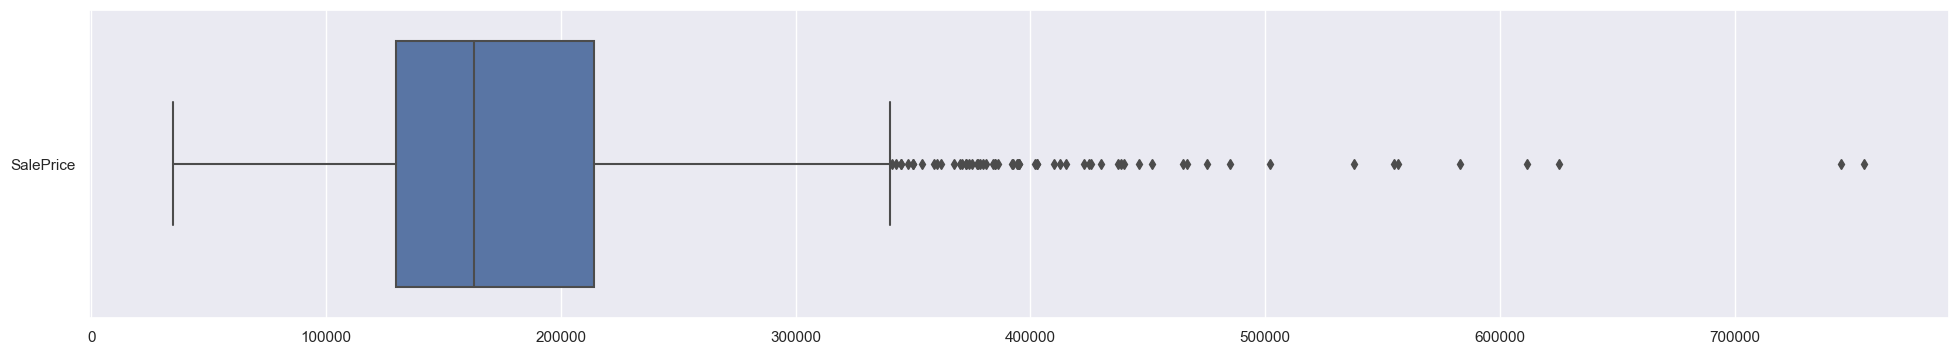

In [16]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = SalePrice, orient = "h")

<AxesSubplot:ylabel='Count'>

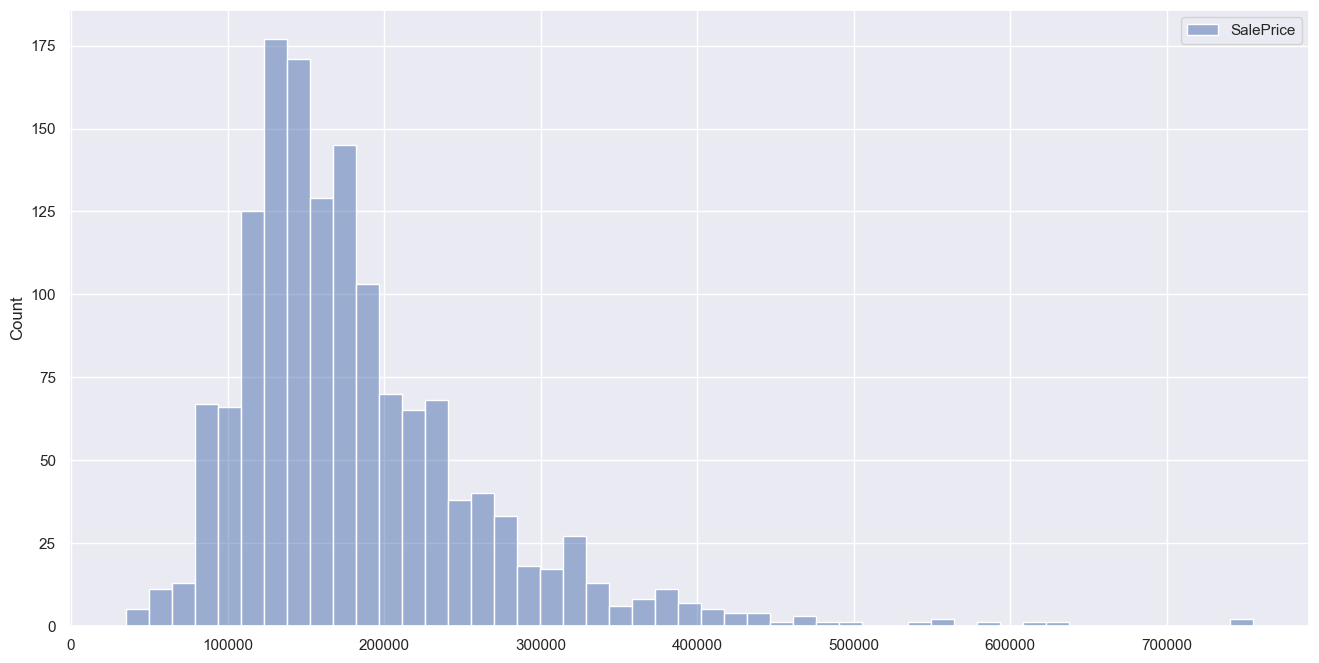

In [17]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = SalePrice)

<AxesSubplot:ylabel='Density'>

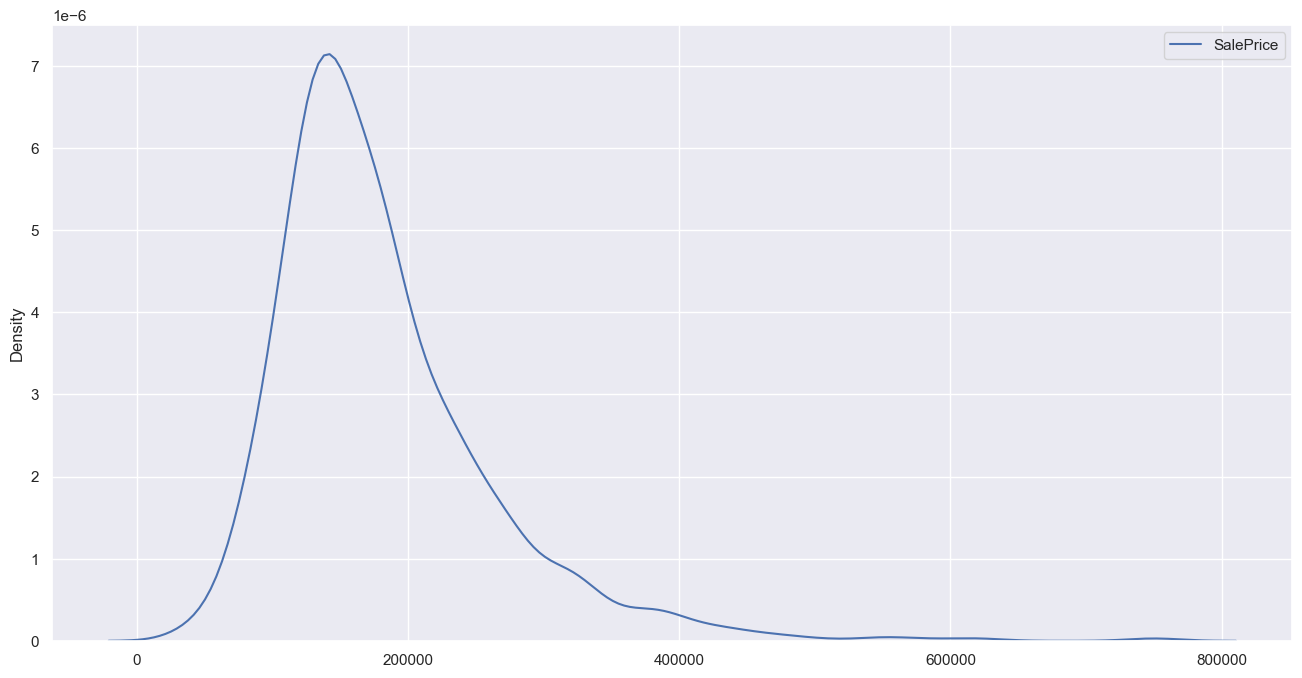

In [18]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = SalePrice)

In [19]:
LotArea = pd.DataFrame(int_data['LotArea'])
LotArea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<AxesSubplot:>

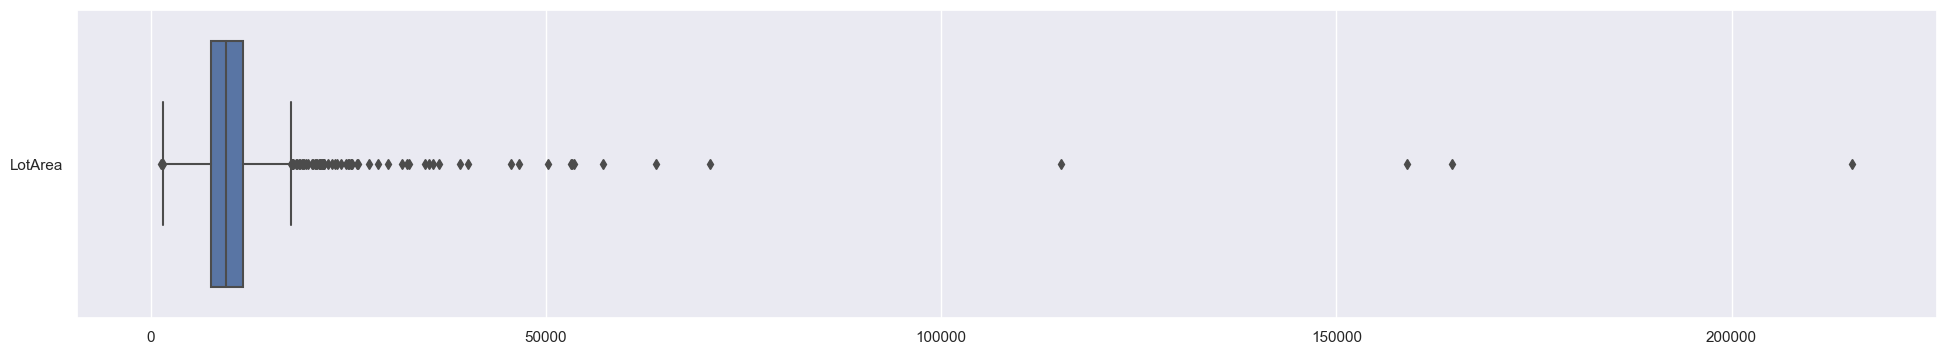

In [20]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = LotArea, orient = "h")

<AxesSubplot:ylabel='Count'>

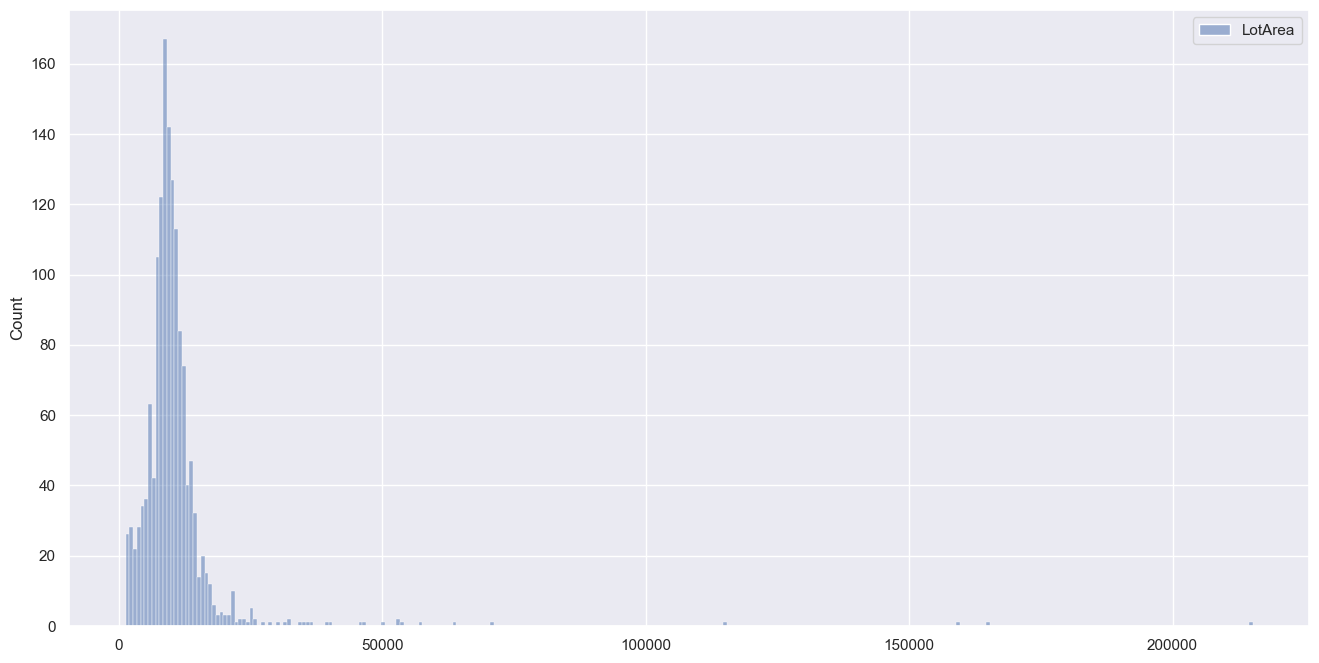

In [21]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = LotArea)

<AxesSubplot:ylabel='Density'>

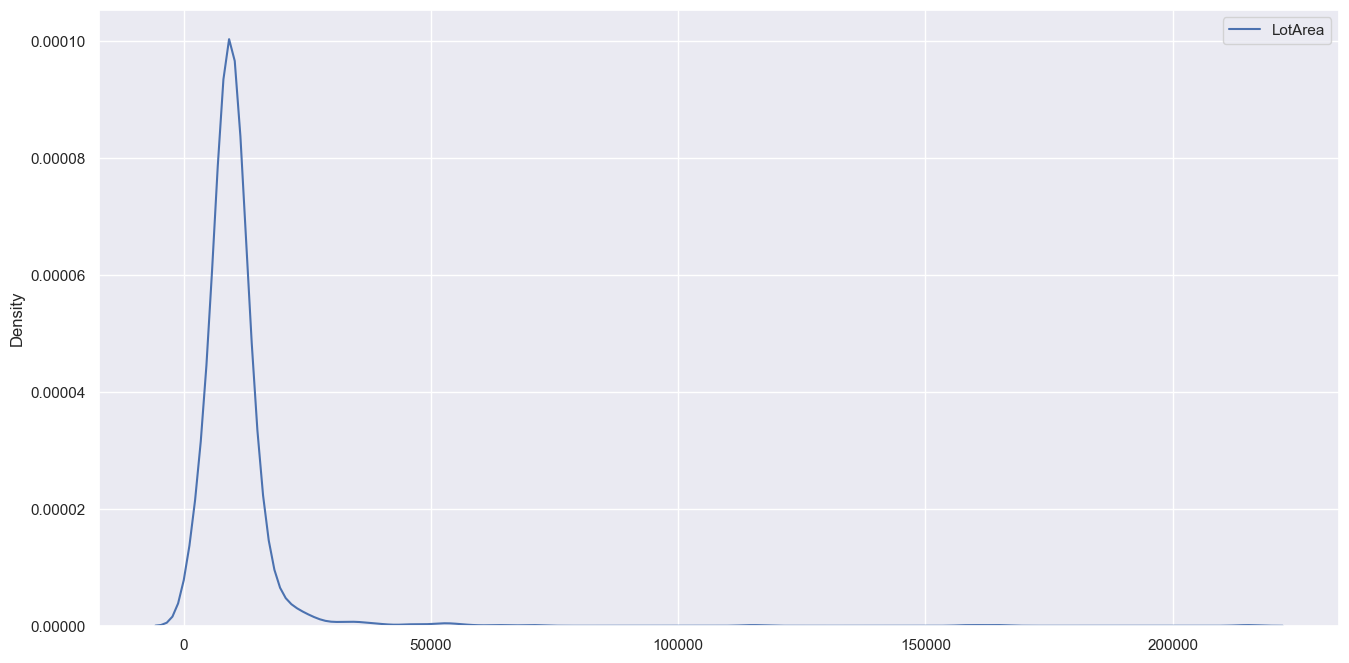

In [22]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = LotArea)

In [24]:
jointDF = pd.concat([SalePrice, LotArea], axis = 1).reindex(SalePrice.index)
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


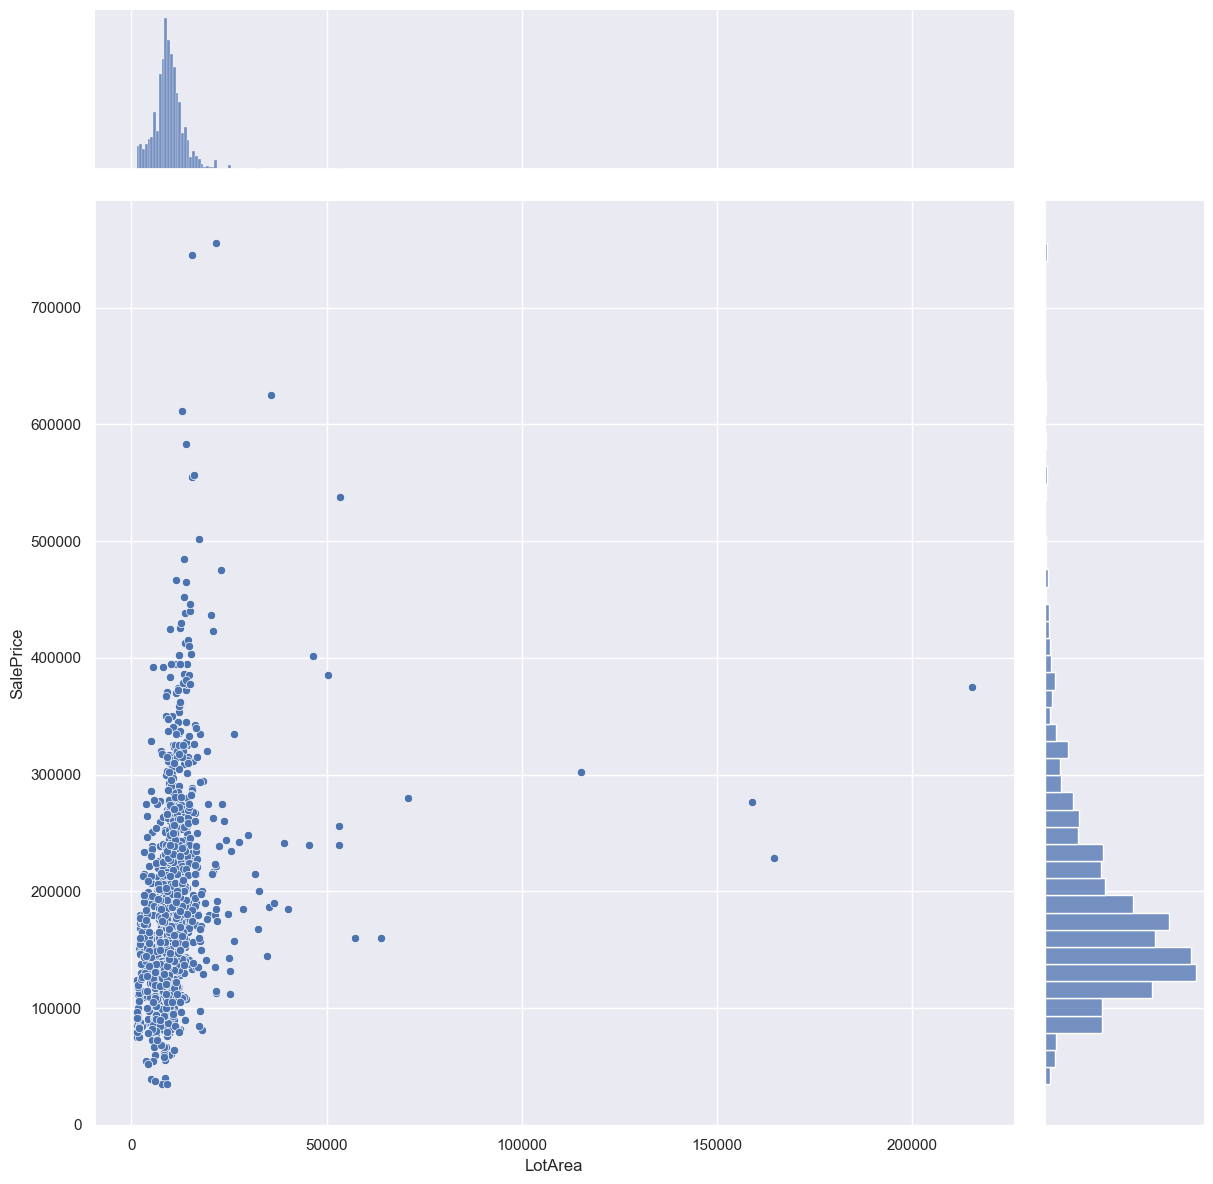

In [25]:
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [26]:
jointDF.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000
